# Milestone 1


=================================================

Milestone 1

Nama  : Irfansyah Alif Muhammad
Batch : HCK-007

Program ini dibuat untuk menganalisis  penjualan video games.

=================================================

## LINK TABLEAU

https://public.tableau.com/views/Milestone1_16922677682880/PresentasiMilestone1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

## Identifikasi Masalah

Saya ingin membuat video games, tetapi masih bingung ingin membuat games tentang apa. Alhasil saya melihat data penjualan video games dari seluruh dunia tetapi hanya dari sampai tahun 2017 saja. Saya ingin melihat apakah ada orang yang menyukai video games dengan genre tertentu dan pada platform mana yang memliki penjualan terbanyak. Maka dari itu saya akan menganalisa penjualan video games.

### SMART

- Specific      : Memahami market penjualan video games, agar dapat memaksimalkan penjualan game saya kedepannya.
- Measureable   : Mengumpulkan dan menganalisis data penjualan video games berdasarkan genre dan platform. 
- Achiveable    : Dapat membuat game dengan grafik yang bagus dan story line yang panjang.
- Relevant      : Dapat menjual games dengan penjualan yang tinggi.
- Time-Bound    : Analisis akan dilakukan dalam rentang waktu 6 hari dan dapat dilakukan pengengembangan video games.

### 5W + 1H

**Penjabaran masalah dengan metode 5W+1H:**

- Keluaran game mana yang memiliki penjualan terbanyak? (visual)

- Siapa publisher yang menjual game terbanyak? (visual)

- Bagaimana pengaruh critic score terhadap penjualan video game? (inferensial)

- Platform apakah yang paling sering digunakan? (visual)

- Mencari mean, median, dan modus dari sales (deskriptif)

- Penjualan game terbanyak berdasarkan Publisher? (visual)

### Problem Statment

Dengan data penjualan video games yang ada, perlu dilakukan analisis untuk mengidentifikasi genre dan platform dengan penjualan tertinggi agar game yang akan dikeluarkan penjualannya akan tinggi

## Data Loading

In [24]:
from bs4 import BeautifulSoup
from time import sleep
from selenium import webdriver
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Untuk import file
data_game = pd.read_csv('Video_Game_Sales.csv')
data_game

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,Nancy Drew: The Deadly Secret of Olde World Park,DS,2007.0,Adventure,Majesco Entertainment,0.00,0.00,0.00,0.00,0.01,64.0,7.0,NaN,NaN,E
17412,Fashion Designer: Style Icon,DS,2007.0,Simulation,505 Games,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17413,Ashita no Joe 2: The Anime Super Remix,PS2,2002.0,Fighting,Capcom,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17414,NadePro!! Kisama no Seiyuu Yatte Miro!,PS2,2009.0,Adventure,GungHo,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN


Untuk column sales itu satuannya millions

## Data Cleaning

In [26]:
# Untuk melihat info
data_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


Dapat dilihat data diatas memiliki 14 column yang terdiri dari 10 column float64 dan 5 object.

In [27]:
# Melihat column mana saja yang memiliki missing value
data_game.isnull().sum()

Name                  0
Platform              0
Year_of_Release       8
Genre                 0
Publisher             1
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       9080
Critic_Count       9080
User_Score         9618
User_Count         9618
Rating             7164
dtype: int64

Dapat dilihat bahwa column critic_score, critic_count, user_score, user count, dan rating memiliki missing value

In [28]:
# Menghilangkan data yang memiliki missing value
data_game_2 = data_game.dropna()
data_game_2

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,Tom Clancys Splinter Cell,PC,2003.0,Action,Ubisoft,0.00,0.00,0.00,0.00,0.01,91.0,20.0,8.5,291.0,T
17401,Blacksite: Area 51,PC,2007.0,Shooter,Midway Games,0.00,0.00,0.00,0.00,0.01,60.0,20.0,4.9,42.0,T
17402,Virtua Tennis 2009,PC,2009.0,Sports,Sega,0.00,0.00,0.00,0.00,0.01,68.0,8.0,6.5,19.0,E
17404,CivCity: Rome,PC,2006.0,Strategy,Take-Two Interactive,0.00,0.00,0.00,0.00,0.01,67.0,46.0,6.9,32.0,E10+


In [29]:
data_game_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7112 entries, 0 to 17407
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7112 non-null   object 
 1   Platform         7112 non-null   object 
 2   Year_of_Release  7112 non-null   float64
 3   Genre            7112 non-null   object 
 4   Publisher        7112 non-null   object 
 5   NA_Sales         7112 non-null   float64
 6   EU_Sales         7112 non-null   float64
 7   JP_Sales         7112 non-null   float64
 8   Other_Sales      7112 non-null   float64
 9   Global_Sales     7112 non-null   float64
 10  Critic_Score     7112 non-null   float64
 11  Critic_Count     7112 non-null   float64
 12  User_Score       7112 non-null   float64
 13  User_Count       7112 non-null   float64
 14  Rating           7112 non-null   object 
dtypes: float64(10), object(5)
memory usage: 889.0+ KB


Dapat dilihat yang awalnya memiliki data sebanyak 17416 menjadi 7112, karena banyaknya row yang memiliki missing value

In [30]:
# Mengubah tipe data year of release menjadi integer
data_game_2['Year_of_Release'] = data_game_2['Year_of_Release'].astype('int')
data_game_2['Year_of_Release']

/var/folders/kh/h3vrtzfx1d1d89_8hgbf50kr0000gn/T/ipykernel_60308/38294514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_game_2['Year_of_Release'] = data_game_2['Year_of_Release'].astype('int')


0        2006
2        2008
3        2009
6        2006
7        2006
         ... 
17394    2003
17401    2007
17402    2009
17404    2006
17407    2016
Name: Year_of_Release, Length: 7112, dtype: int64

In [31]:
data_game_2['Year_of_Release'].info()

<class 'pandas.core.series.Series'>
Index: 7112 entries, 0 to 17407
Series name: Year_of_Release
Non-Null Count  Dtype
--------------  -----
7112 non-null   int64
dtypes: int64(1)
memory usage: 111.1 KB


Dapat dilihat bahwa untuk kolom tahun sudah berubah menjadi integer yang awalnya float.

In [32]:
dg2 = data_game_2
dg2

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,Tom Clancys Splinter Cell,PC,2003,Action,Ubisoft,0.00,0.00,0.00,0.00,0.01,91.0,20.0,8.5,291.0,T
17401,Blacksite: Area 51,PC,2007,Shooter,Midway Games,0.00,0.00,0.00,0.00,0.01,60.0,20.0,4.9,42.0,T
17402,Virtua Tennis 2009,PC,2009,Sports,Sega,0.00,0.00,0.00,0.00,0.01,68.0,8.0,6.5,19.0,E
17404,CivCity: Rome,PC,2006,Strategy,Take-Two Interactive,0.00,0.00,0.00,0.00,0.01,67.0,46.0,6.9,32.0,E10+


## Analisis dan Perhitungan

### Keluaran game mana yang memiliki penjualan terbanyak?

In [33]:
# Melihat table
dg2

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,Tom Clancys Splinter Cell,PC,2003,Action,Ubisoft,0.00,0.00,0.00,0.00,0.01,91.0,20.0,8.5,291.0,T
17401,Blacksite: Area 51,PC,2007,Shooter,Midway Games,0.00,0.00,0.00,0.00,0.01,60.0,20.0,4.9,42.0,T
17402,Virtua Tennis 2009,PC,2009,Sports,Sega,0.00,0.00,0.00,0.00,0.01,68.0,8.0,6.5,19.0,E
17404,CivCity: Rome,PC,2006,Strategy,Take-Two Interactive,0.00,0.00,0.00,0.00,0.01,67.0,46.0,6.9,32.0,E10+


In [34]:
# Melihat ada berapa tahun dalam colum
dg2['Year_of_Release'].unique()

array([2006, 2008, 2009, 2005, 2007, 2010, 2013, 2004, 2002, 2001, 2011,
       2012, 2014, 1997, 1999, 2016, 2015, 2003, 1998, 1996, 2000, 1994,
       1985, 1992, 1988])

In [35]:
# Membuat nama lain dari dg2 ke dg3
dg3 = dg2

In [36]:
# Membuat column dengan batas keluaran game
dg3.loc[dg3['Year_of_Release'] < 2007, 'Keluaran_Game'] = 'Game Lawas'
dg3.loc[dg3['Year_of_Release'] >= 2007, 'Keluaran_Game'] = 'Game Baru'

/var/folders/kh/h3vrtzfx1d1d89_8hgbf50kr0000gn/T/ipykernel_60308/3610186653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg3.loc[dg3['Year_of_Release'] < 2007, 'Keluaran_Game'] = 'Game Lawas'


Dengan menggunakan ini maka akan terlihat game mana yang keluaran baru atau keluaran lama, jika game keluar dibawah 2007 maka namanya akan menjadi game lawas, sedangkan jika 2007 keatas maka akan menjadi game baru

In [37]:
# Melihat apakah column baru sudah masuk
dg3

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Keluaran_Game
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E,Game Lawas
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E,Game Baru
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E,Game Baru
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E,Game Lawas
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E,Game Lawas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,Tom Clancys Splinter Cell,PC,2003,Action,Ubisoft,0.00,0.00,0.00,0.00,0.01,91.0,20.0,8.5,291.0,T,Game Lawas
17401,Blacksite: Area 51,PC,2007,Shooter,Midway Games,0.00,0.00,0.00,0.00,0.01,60.0,20.0,4.9,42.0,T,Game Baru
17402,Virtua Tennis 2009,PC,2009,Sports,Sega,0.00,0.00,0.00,0.00,0.01,68.0,8.0,6.5,19.0,E,Game Baru
17404,CivCity: Rome,PC,2006,Strategy,Take-Two Interactive,0.00,0.00,0.00,0.00,0.01,67.0,46.0,6.9,32.0,E10+,Game Lawas


Dapat dilihat bahwa game keluaran dibawah 2007 termasuk game lawas sedangkan game keluaran diawas 2007 termasuk game baru

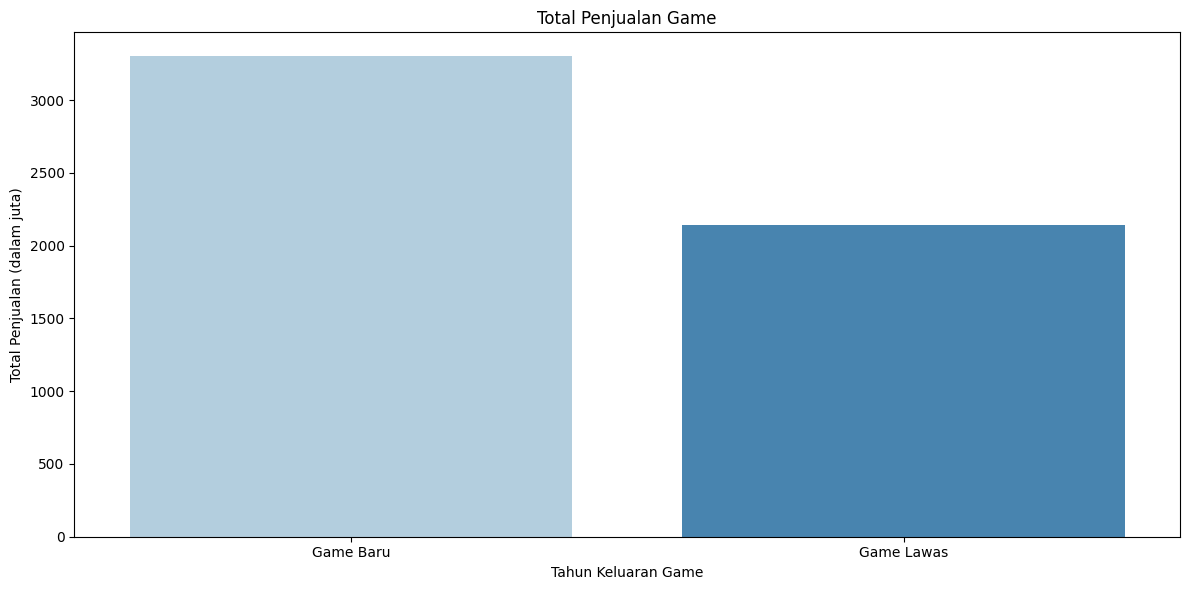

In [38]:
# Membuat chart total penjualan game
total_penjualan_game = dg3.groupby('Keluaran_Game')['Global_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
bar = sns.barplot(data=total_penjualan_game, x='Keluaran_Game', y='Global_Sales', palette='Blues')
plt.title('Total Penjualan Game')
plt.xlabel('Tahun Keluaran Game')
plt.ylabel('Total Penjualan (dalam juta)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Dapat dilihat bahwa total penjualan game baru (diatas 2007) memiliki total penjualan yang lebih tinggi dibandingkan game lawas

### Siapa publisher yang menjual game terbanyak

In [39]:
# Mencari tahu siapa publisher dengan penjualan terbanyak
publisher_sales = dg3.groupby('Publisher')['Global_Sales'].sum()

max_publisher = publisher_sales.idxmax()
max_sales = publisher_sales.max()

print(f"Publisher dengan penjualan terbanyak yaitu {max_publisher} dengan {max_sales:.2f} juta penjualan.")

Publisher dengan penjualan terbanyak yaitu Electronic Arts dengan 898.12 juta penjualan.


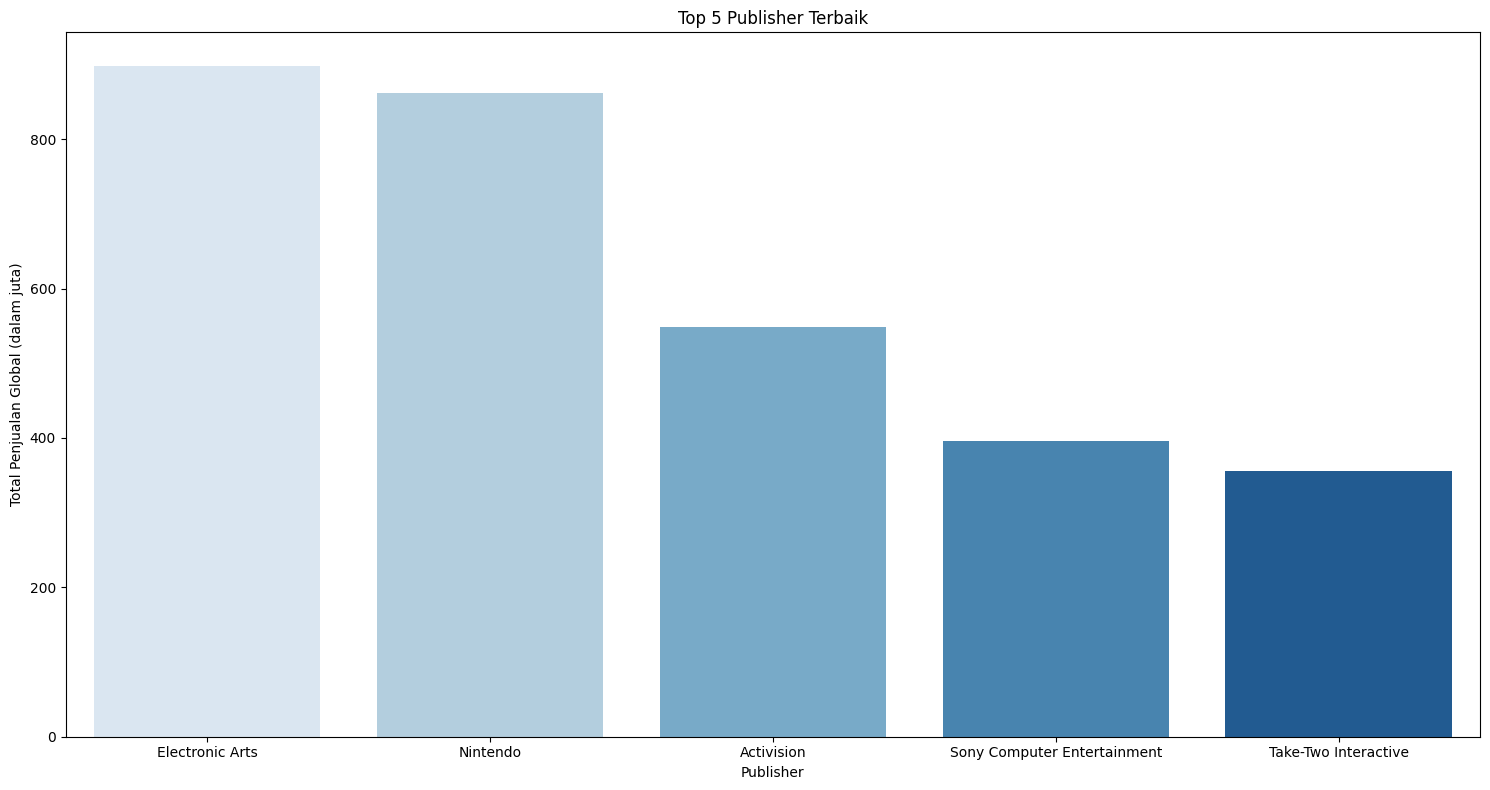

In [40]:
best_publisher = dg3.groupby('Publisher')['Global_Sales'].sum().reset_index()
top_publisher = best_publisher.sort_values(by='Global_Sales', ascending=False)
top_5 = top_publisher.head(5)
top_data = pd.concat([top_5])

plt.figure(figsize=(15, 8))
bar = sns.barplot(data=top_data, x='Publisher', y='Global_Sales', palette='Blues')
plt.title('Top 5 Publisher Terbaik')
plt.xlabel('Publisher')
plt.ylabel('Total Penjualan Global (dalam juta)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Bagaimana pengaruh critic score terhadap penjualan video game

Untuk menjawab itu kita akan melakukan uji coba dengan menghitung critic score dan penjualan video game dengan pearson.


**Untuk melakukan tes ini kita perlu mendefinisikan hipotesis:**

**H0**: Tidak ada hubungan signifikan

**H1**: Adanya hubungan signifikan antara critic score dan global sales

Jika dibawah 0.05 maka ada hubungan signifikan antara critic score dan global sales maka diterima

In [41]:
correlation = dg3['Critic_Score'].corr(dg3['Global_Sales'])
slope, intercept, r_value, p_value, std_err = stats.linregress(dg3['Critic_Score'], dg3['Global_Sales'])

print("Pearson korelasi:", correlation)
print("P-value:", p_value)

if p_value < 0.05:
    print("Ada hubungan yang signifikan antara critic score dan global sales karena kurang dari 0.05.")
else:
    print("Tidak ada hubungan yang signifikan antara critic score dan global sales.")

Pearson korelasi: 0.23731717973525884
P-value: 1.266318349558838e-91
Ada hubungan yang signifikan antara critic score dan global sales karena kurang dari 0.05.


Dapat dilihat bahwa p-value dibawah 0.05 maka, ada hubungan yang signifikan antara critic score dan global sales,

Maka H1 diterima

### Platform apakah yang paling sering digunakan

In [42]:
top_platform = dg3['Platform'].value_counts()
max_platform = top_platform.idxmax()
maxx_platform = top_platform.max()
print(f"Platform yang paling sering digunakan yaitu {max_platform} sebanyal {maxx_platform}.")

Platform yang paling sering digunakan yaitu PS2 sebanyal 1169.


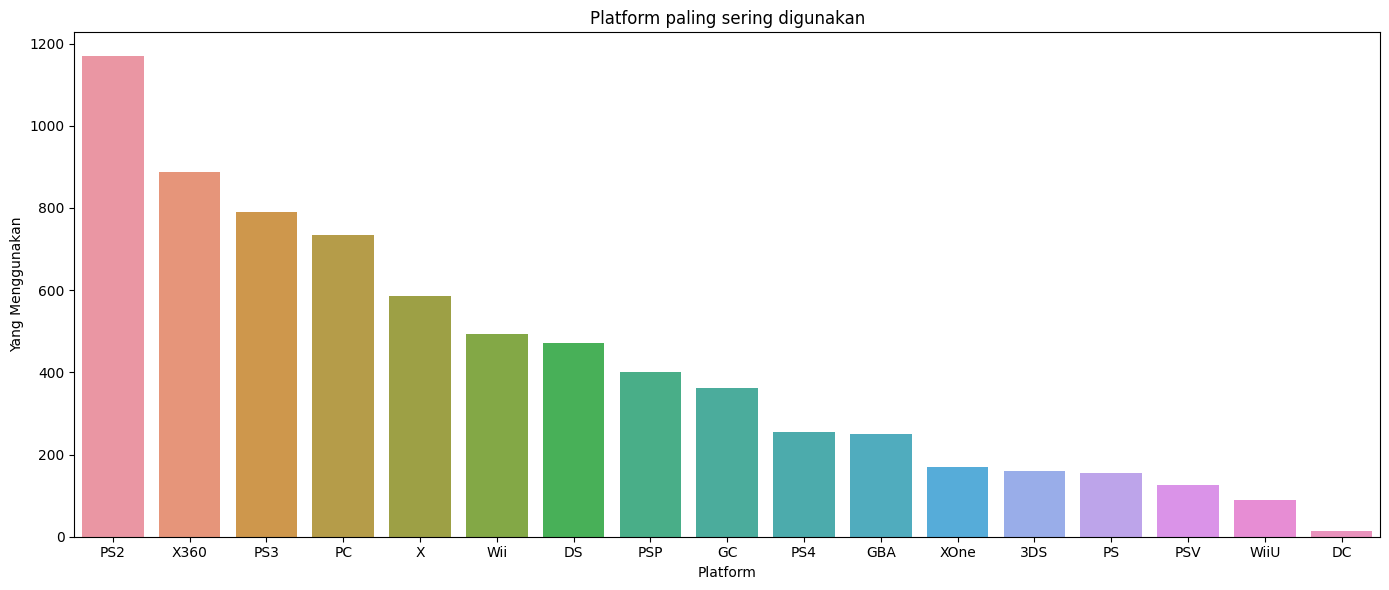

In [43]:
plt.figure(figsize=(14, 6))
sns.barplot(x=top_platform.index, y=top_platform.values)
plt.title('Platform paling sering digunakan')
plt.xlabel('Platform')
plt.ylabel('Yang Menggunakan')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Dapat dilihat bahwa platform yang paling sering digunakan yaitu PS2 sebanyak 1169 dan setelah itu ada X360.

### Mencari mean, median, dan modus dari sales

In [45]:
# Mencari rata rata dari global sales
dg3['Global_Sales'].mean()

0.765306524184477

In [46]:
# Mencari nilai tengah dari global sales
dg3['Global_Sales'].median()

0.29

In [47]:
# Mencari yang paling sering keluar dari global sales
dg3['Global_Sales'].mode()

0    0.02
Name: Global_Sales, dtype: float64

Rata-rata penjualan game yaitu 765 ribu copy.

Nilai tengah dari penjualan game yaitu 290 ribu copy.

Nilai yang paling sering keluar dari penjualan yaitu 20 ribu copy.

Sehingga dapat disimpulkan bahwa dari seluruh game yang di luncurkan oleh publisher banyak game yang terjual banyak.

### Penjualan game terbanyak berdasarkan Publisher

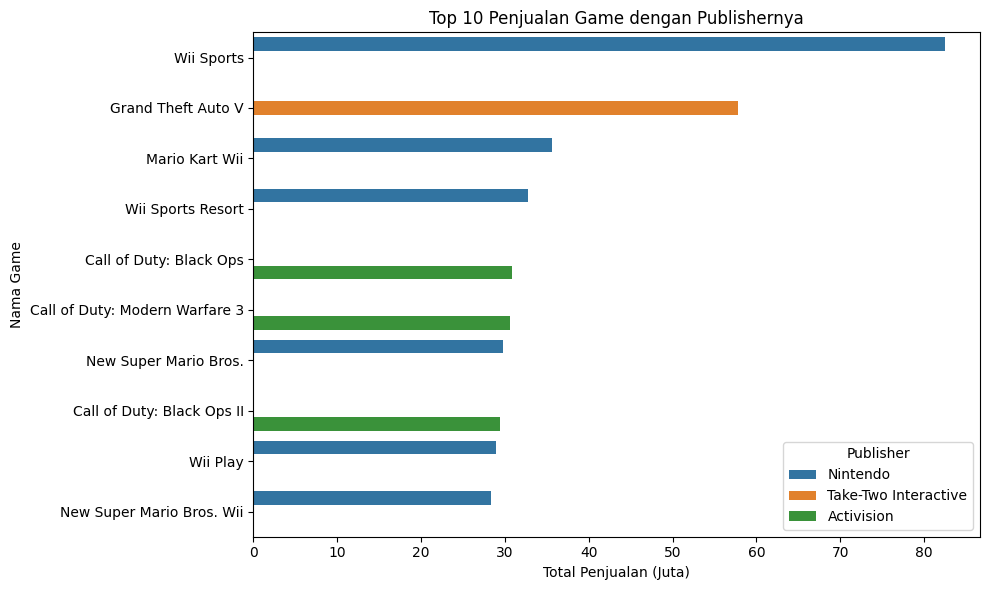

In [48]:
# Membuat groupby antara nama game dengan publisher
grouped_by = dg3.groupby(['Name','Publisher']).agg({'Global_Sales':'sum'}).reset_index()  # Ganti dengan hasil pengelompokkan yang Anda miliki

# Membuat hanya top10 game
groupedby_top10 = grouped_by.sort_values(by='Global_Sales', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Global_Sales', y='Name', hue='Publisher', data=groupedby_top10, dodge=True)

plt.xlabel('Total Penjualan (Juta)')
plt.ylabel('Nama Game')
plt.title('Top 10 Penjualan Game dengan Publishernya')
plt.tight_layout()
plt.legend(title='Publisher')
plt.show()

Dapat dilihat bahwa Nintendo jarang mengeluarkan game yang memiliki rating M, sedangkan untuk publisher lain banyak yang mengeluarkan rating lainnya.

## Recap

- Keluaran game mana yang memiliki penjualan terbanyak, Ternyata game baru lebih banyak total penjualannnya diandingkan game lawas.

- Siapa publisher yang menjual game terbanyak, Ternyata publisher yang menjual game paling banyak yaitu Electronic Arts dengan 898.12 juta penjualan

- Bagaimana pengaruh critic score terhadap penjualan video game, Dikarenakan P-Value dibawah 0.05, maka ada hubungan yang signifikan antara critic score dengan global sales sehingga H1 diterima

- Platform apakah yang paling sering digunakan, Ternyata platform game yang paling banyak menggunakan PS2 dan digunakan sebanyak 1169 game

- Untuk penjualan didapatkan Rata-rata sebesar 0.765 atau 765 ribu terjual, Nilai tengah sebesar 0.29 atau 290 ribu terjual, dan untuk yang paling keluar sebanyak 0.02 atau 20 ribu terjual

- Apakah rating berpengaruh terhadap publisher, Ternyata rating berpengaruh terhadap publisher karena banyak publisher yang mengeluarkan game dengan rating tertentu

## Conclusion

**Kesimpulan:** Dengan game keluaran terbaru maka akan mendapatkan penjualan yang tinggi, publisher juga mempengaruhi game yang terjual, platform yang paling banyak digunakan yaitu PS2 dan rating yang banyak digunakan yaitu E, T, dan E10+. Maka dengan membuat game untuk PS2 dengan rating E, T, atau E10+ akan banyak yang membeli atau meningkatkan penjualan.